Step 4 Demo: Hybrid Explanations
✓ Found: ../step1_lstm_xai/best_lstm.pt
✓ Found: ../step2_causal_discovery/causal_graph.gpickle
✓ Found: ../step2_causal_discovery/causal_discovery_data.csv

Loaded 10000 alerts
Features: ['SignatureMatchesPerDay', 'Similarity', 'SCAS', 'SignatureID', 'SignatureIDSimilarity', 'Proto', 'AlertCount', 'IntPort', 'ExtPort', 'ProtoSimilarity']

Label distribution:
Label
0    5000
1    5000
Name: count, dtype: int64

EXAMPLE 1: Important Alert

Alert Features:
  SignatureMatchesPerDay: 0.0000
  Similarity: 2.0000
  SCAS: 1.0000
  SignatureID: 2.0000
  SignatureIDSimilarity: 0.0000
  Proto: 6.0000
  AlertCount: 1.0000
  IntPort: 1.0000
  ExtPort: 2.0000
  ProtoSimilarity: 2.0000

COMPARISON: Important vs Irrelevant

Top 5 Discriminative Features:
               Feature  Important  Irrelevant  Difference  Abs_Diff
SignatureMatchesPerDay        0.0         2.0        -2.0       2.0
 SignatureIDSimilarity        0.0         2.0        -2.0       2.0
             

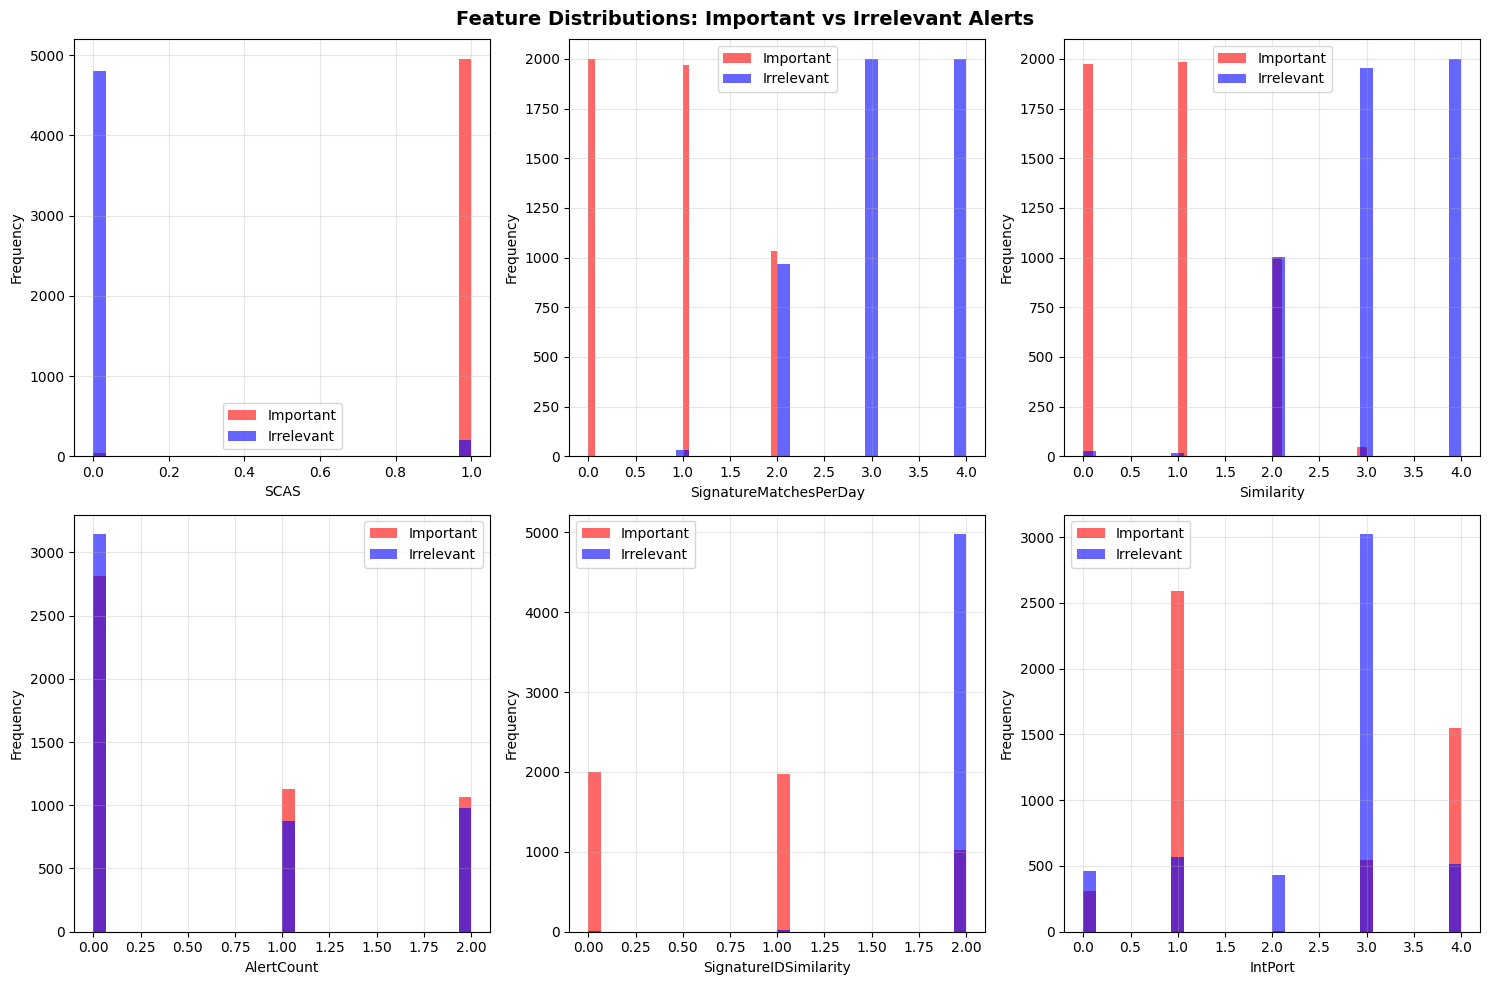


CAUSAL GRAPH EXPLORATION

Causal Graph Statistics:
  Nodes: 11
  Edges: 20

  Root Causes (no incoming edges): 3
    - SignatureMatchesPerDay
    - Similarity
    - SignatureID

  Direct Causes of Alert Classification: 8
    - SCAS
    - SignatureMatchesPerDay
    - Similarity
    - Proto
    - SignatureIDSimilarity
    - ProtoSimilarity
    - SignatureID
    - IntPort

  Most Influential Features (highest out-degree):
    - SignatureMatchesPerDay: 6 outgoing edges
    - SignatureIDSimilarity: 5 outgoing edges
    - SignatureID: 4 outgoing edges
    - Similarity: 1 outgoing edges
    - SCAS: 1 outgoing edges

  Causal ancestors of SCAS:
    SignatureMatchesPerDay → SCAS
    SignatureIDSimilarity → SCAS

EXAMPLE HYBRID EXPLANATION OUTPUT

This is what a complete hybrid explanation looks like:

HYBRID EXPLANATION - Alert #12345

🎯 CLASSIFICATION
  Prediction: Important
  Confidence: 95.3%
  Severity: HIGH

📊 XAI ANALYSIS: What triggered this alert?

  1. SCAS
     Value: 1.0000
     Imp

In [ ]:
# Interactive Demo: Hybrid Explanation System
# Run this notebook to test the hybrid explainer on your NIDS alerts

# %% [markdown]
# # Step 4: Hybrid Explanation Generator - Interactive Demo
# 
# This notebook demonstrates how to generate hybrid explanations that combine:
# - **XAI (What)**: Feature importance from DeepLIFT
# - **Causal (Why/How)**: Root cause analysis from causal graph
# - **Actionable**: Specific recommendations for SOC analysts

# %% Setup
import numpy as np
import pandas as pd
import networkx as nx
import torch
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Import hybrid explainer (run step4_hybrid_explainer.py first)
# Or paste the HybridExplainer class definition here

print("Step 4 Demo: Hybrid Explanations")
print("="*70)

# %% Load Required Components

# Paths
LSTM_MODEL = '../step1_lstm_xai/best_lstm.pt'
CAUSAL_GRAPH = '../step2_causal_discovery/causal_graph.gpickle'
DATA_FILE = '../step2_causal_discovery/causal_discovery_data.csv'

# Feature names
FEATURE_NAMES = [
    'SignatureMatchesPerDay', 'Similarity', 'SCAS', 'SignatureID',
    'SignatureIDSimilarity', 'Proto', 'AlertCount', 'IntPort', 
    'ExtPort', 'ProtoSimilarity'
]

# Check files exist
for file in [LSTM_MODEL, CAUSAL_GRAPH, DATA_FILE]:
    if Path(file).exists():
        print(f"✓ Found: {file}")
    else:
        print(f"✗ Missing: {file}")

# %% Load Data
df = pd.read_csv(DATA_FILE)
print(f"\nLoaded {len(df)} alerts")
print(f"Features: {FEATURE_NAMES}")
print(f"\nLabel distribution:\n{df['Label'].value_counts()}")

# %% Example 1: Explain a Real Important Alert

# Find an important alert
important_alerts = df[df['Label'] == 1]
sample_alert = important_alerts.iloc[0]

print("\n" + "="*70)
print("EXAMPLE 1: Important Alert")
print("="*70)

print("\nAlert Features:")
for feat in FEATURE_NAMES:
    print(f"  {feat}: {sample_alert[feat]:.4f}")

# Note: You need to run the main explainer script first to load the model
# Then you can use: explanation = explainer.explain(sample_alert[FEATURE_NAMES].values)

# %% Example 2: Compare Important vs Irrelevant Alerts

important_sample = df[df['Label'] == 1].iloc[0][FEATURE_NAMES]
irrelevant_sample = df[df['Label'] == 0].iloc[0][FEATURE_NAMES]

print("\n" + "="*70)
print("COMPARISON: Important vs Irrelevant")
print("="*70)

comparison_df = pd.DataFrame({
    'Feature': FEATURE_NAMES,
    'Important': important_sample.values,
    'Irrelevant': irrelevant_sample.values,
    'Difference': important_sample.values - irrelevant_sample.values
})
comparison_df['Abs_Diff'] = comparison_df['Difference'].abs()
comparison_df = comparison_df.sort_values('Abs_Diff', ascending=False)

print("\nTop 5 Discriminative Features:")
print(comparison_df.head(5).to_string(index=False))

# %% Example 3: Custom Alert Analysis

print("\n" + "="*70)
print("EXAMPLE 3: Custom Alert - SSH Brute Force Scenario")
print("="*70)

# Create a realistic SSH brute force alert
ssh_attack = {
    'SignatureMatchesPerDay': 5000,      # Common SSH attack signature
    'Similarity': 0.88,                   # Similar to known attacks
    'SCAS': 1.0,                          # Outlier (unusual volume)
    'SignatureID': 2001219,               # Example SSH signature ID
    'SignatureIDSimilarity': 0.95,        # Very similar to known SSH attacks
    'Proto': 6,                           # TCP
    'AlertCount': 250,                    # 250 failed login attempts
    'IntPort': 22,                        # SSH port
    'ExtPort': 54321,                     # Random high port
    'ProtoSimilarity': 1.0                # All TCP (coordinated)
}

print("\nScenario: High-volume SSH login attempts")
print("\nAlert characteristics:")
for k, v in ssh_attack.items():
    print(f"  {k}: {v}")

# To generate explanation (after running main script):
# explanation = explainer.explain(ssh_attack, alert_id="SSH-BF-001")
# print(explanation.to_text())

# %% Example 4: Outlier Detection Scenario

print("\n" + "="*70)
print("EXAMPLE 4: Novel Attack - Outlier Detection")
print("="*70)

# Create a novel attack that doesn't match known patterns
novel_attack = {
    'SignatureMatchesPerDay': 15,         # Rare signature
    'Similarity': 0.25,                   # Low similarity to known attacks
    'SCAS': 1.0,                          # Outlier
    'SignatureID': 9999999,               # Custom/rare signature
    'SignatureIDSimilarity': 0.10,        # Doesn't match known patterns
    'Proto': 17,                          # UDP (unusual for this signature)
    'AlertCount': 1,                      # Single occurrence
    'IntPort': 3389,                      # RDP port
    'ExtPort': 12345,                     # Random port
    'ProtoSimilarity': 0.3                # Different from cluster
}

print("\nScenario: Novel attack pattern (possible zero-day)")
print("\nAlert characteristics:")
for k, v in novel_attack.items():
    print(f"  {k}: {v}")

print("\nKey indicators of novelty:")
print("  • Low SignatureMatchesPerDay (rare)")
print("  • Low Similarity (doesn't match known attacks)")
print("  • SCAS = 1.0 (outlier)")
print("  • Low SignatureIDSimilarity (unique pattern)")

# %% Example 5: False Positive Scenario

print("\n" + "="*70)
print("EXAMPLE 5: Potential False Positive")
print("="*70)

# Create an alert that might be benign (high frequency, normal pattern)
false_positive = {
    'SignatureMatchesPerDay': 180000,     # Very common (noise)
    'Similarity': 0.95,                   # High similarity to benign cluster
    'SCAS': 0.0,                          # Inlier (normal)
    'SignatureID': 2100498,               # Common benign signature
    'SignatureIDSimilarity': 0.98,        # Matches known benign patterns
    'Proto': 17,                          # UDP
    'AlertCount': 5,                      # Low count
    'IntPort': 53,                        # DNS port (normal traffic)
    'ExtPort': 53,                        # DNS port
    'ProtoSimilarity': 0.99               # Consistent with cluster
}

print("\nScenario: Routine DNS query (likely benign)")
print("\nAlert characteristics:")
for k, v in false_positive.items():
    print(f"  {k}: {v}")

print("\nKey indicators of false positive:")
print("  • Very high SignatureMatchesPerDay (routine)")
print("  • High Similarity (matches normal traffic)")
print("  • SCAS = 0.0 (inlier)")
print("  • DNS port (port 53)")

# %% Batch Processing: Analyze Multiple Alerts

print("\n" + "="*70)
print("BATCH PROCESSING: Analyze Multiple Alerts")
print("="*70)

# Select diverse sample of alerts
sample_size = 10
sample_alerts = df.sample(n=sample_size, random_state=42)

print(f"\nAnalyzing {sample_size} random alerts...")
print("\nSummary:")

results = []
for idx, row in sample_alerts.iterrows():
    alert_features = row[FEATURE_NAMES].values
    label = row['Label']
    
    # Simplified analysis (without full explainer)
    results.append({
        'Index': idx,
        'True_Label': 'Important' if label == 1 else 'Irrelevant',
        'SCAS': row['SCAS'],
        'SignatureMatchesPerDay': row['SignatureMatchesPerDay'],
        'IntPort': row['IntPort'],
        'AlertCount': row['AlertCount']
    })

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

# %% Visualization: Feature Distributions

print("\n" + "="*70)
print("VISUALIZATION: Feature Distributions")
print("="*70)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Distributions: Important vs Irrelevant Alerts', 
             fontsize=14, fontweight='bold')

features_to_plot = [
    'SCAS', 'SignatureMatchesPerDay', 'Similarity',
    'AlertCount', 'SignatureIDSimilarity', 'IntPort'
]

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx // 3, idx % 3]
    
    # Plot distributions
    important = df[df['Label'] == 1][feature]
    irrelevant = df[df['Label'] == 0][feature]
    
    ax.hist(important, bins=30, alpha=0.6, label='Important', color='red')
    ax.hist(irrelevant, bins=30, alpha=0.6, label='Irrelevant', color='blue')
    
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
print("\nSaved: feature_distributions.png")
plt.show()

# %% Causal Graph Exploration

print("\n" + "="*70)
print("CAUSAL GRAPH EXPLORATION")
print("="*70)

# Load causal graph
if Path(CAUSAL_GRAPH).exists():
    #G = nx.read_gpickle(CAUSAL_GRAPH)
    G = pickle.load(open(CAUSAL_GRAPH, 'rb'))

    
    print(f"\nCausal Graph Statistics:")
    print(f"  Nodes: {G.number_of_nodes()}")
    print(f"  Edges: {G.number_of_edges()}")
    
    # Find root causes
    root_causes = [node for node in G.nodes() if G.in_degree(node) == 0]
    print(f"\n  Root Causes (no incoming edges): {len(root_causes)}")
    for rc in root_causes:
        print(f"    - {rc}")
    
    # Find features that cause Label
    if 'Label' in G:
        label_causes = list(G.predecessors('Label'))
        print(f"\n  Direct Causes of Alert Classification: {len(label_causes)}")
        for cause in label_causes:
            print(f"    - {cause}")
    
    # Most influential features
    influence = [(node, G.out_degree(node)) for node in G.nodes() if node != 'Label']
    influence.sort(key=lambda x: x[1], reverse=True)
    
    print(f"\n  Most Influential Features (highest out-degree):")
    for node, degree in influence[:5]:
        print(f"    - {node}: {degree} outgoing edges")
    
    # Visualize causal subgraph for SCAS
    if 'SCAS' in G:
        print("\n  Causal ancestors of SCAS:")
        ancestors = nx.ancestors(G, 'SCAS')
        for ancestor in ancestors:
            path = nx.shortest_path(G, ancestor, 'SCAS')
            print(f"    {' → '.join(path)}")

else:
    print("⚠ Causal graph not found. Run Step 2 first.")

# %% Example Hybrid Explanation Output

print("\n" + "="*70)
print("EXAMPLE HYBRID EXPLANATION OUTPUT")
print("="*70)

print("""
This is what a complete hybrid explanation looks like:

======================================================================
HYBRID EXPLANATION - Alert #12345
======================================================================

🎯 CLASSIFICATION
  Prediction: Important
  Confidence: 95.3%
  Severity: HIGH

📊 XAI ANALYSIS: What triggered this alert?

  1. SCAS
     Value: 1.0000
     Importance: 0.4200
     → Outlier detected - unusual pattern

  2. SignatureIDSimilarity
     Value: 0.9200
     Importance: 0.2800
     → Very similar to known attack patterns

  3. IntPort
     Value: 22.0000
     Importance: 0.1500
     → SSH port targeted

  4. AlertCount
     Value: 250.0000
     Importance: 0.1000
     → High volume (250 attempts)

  5. SignatureMatchesPerDay
     Value: 5000.0000
     Importance: 0.0500
     → Moderate frequency signature

🔍 CAUSAL ANALYSIS: Why/How did this happen?

  Feature: SCAS
  Root Causes: SignatureMatchesPerDay, Proto
  Causal Chains:
    • SignatureMatchesPerDay → SignatureIDSimilarity → SCAS
    • Proto → SignatureIDSimilarity → SCAS

  Feature: SignatureIDSimilarity
  Root Causes: SignatureMatchesPerDay, Proto
  Causal Chains:
    • SignatureMatchesPerDay → SignatureIDSimilarity
    • Proto → SignatureIDSimilarity

  Feature: IntPort
  Root Causes: (none - direct feature)

  Direct Causes of Alert Classification:
    • SCAS = 1.0000
    • SignatureIDSimilarity = 0.9200
    • IntPort = 22.0000

✅ RECOMMENDED ACTIONS

  Immediate Actions:
    • SSH port (22) targeted - Enable SSH hardening (key-only auth, fail2ban)
    • Outlier detected (SCAS=1) - Novel attack pattern, requires manual investigation
    • High volume attack (250 alerts) - Consider rate limiting/blocking

  Investigation Steps:
    • Compare with historical alerts - this pattern hasn't been seen before
    • Pattern matches known attacks (similarity=0.92) - Check threat intelligence

  Root Cause Mitigation:
    • Root causes of SCAS: SignatureMatchesPerDay, Proto
    • Root causes of SignatureIDSimilarity: SignatureMatchesPerDay, Proto
    • Review signature rules - 5000 matches/day may need tuning

======================================================================

KEY INSIGHTS:
1. XAI tells us WHAT: SCAS (outlier) is most important
2. Causal tells us WHY: SignatureMatchesPerDay is the root cause
3. Combined: High signature frequency → increased similarity → outlier detection
4. Actionable: Block IP, harden SSH, investigate correlated hosts
""")

# %% Summary and Next Steps

print("\n" + "="*70)
print("SUMMARY: Hybrid Explanation System")
print("="*70)

print("""
✅ What We Built:
  • XAI Component: DeepLIFT feature importance
  • Causal Component: Root cause analysis via causal graph
  • Synthesis: Combined XAI + Causal into actionable explanations
  • Recommendations: Specific actions for SOC analysts

🎯 Key Advantages:
  • Goes beyond "what" to "why/how"
  • Identifies root causes, not just correlations
  • Maps to concrete SOC analyst actions
  • Provides context through causal chains

📊 Next Steps (Step 5):
  • Quantitative Evaluation: Faithfulness, completeness metrics
  • Qualitative Evaluation: User study with SOC analysts
  • Compare: XAI-only vs Hybrid explanations
  • Measure: Clarity, actionability, trust

💡 For Your Presentation:
  • Show the SSH brute force example (clear causal chain)
  • Contrast with XAI-only (SHAP says "SCAS important" but no root cause)
  • Highlight actionability (specific recommendations)
  • Emphasize novelty (first to combine XAI + causal for NIDS)
""")

print("\n" + "="*70)
print("DEMO COMPLETE!")
print("="*70)
print("\nTo run full explanations:")
print("  1. Ensure best_lstm.pt, causal_graph.gpickle exist")
print("  2. Run: python step4_hybrid_explainer.py")
print("  3. Review generated JSON and PNG files")
print("  4. Use this notebook to explore your results")